In [7]:
import os
import xml.etree.ElementTree as ET

In [8]:
file_path = r"C:\Users\Admin\Desktop\final-cdms"

In [9]:
print(f"Directory exists: {os.path.exists(file_path)}")

Directory exists: True


In [31]:
import xml.etree.ElementTree as ET
import pandas as pd
import os

# Define the directory containing the XML files
xml_directory = r"C:\Users\Admin\Desktop\final-cdms"

# List all XML files in the directory
xml_files = [f for f in os.listdir(xml_directory) if f.endswith('.xml')]

# Initialize an empty list to hold all the data
all_data = []

# Loop through each XML file in the directory
for xml_file in xml_files:
    xml_path = os.path.join(xml_directory, xml_file)
    
    # Parse the XML content
    tree = ET.parse(xml_path)
    root = tree.getroot()

    # Extract global event data
    header = root.find('header')
    creation_date = header.findtext('CREATION_DATE', default=None)
    relative_metadata = root.find(".//relativeMetadataData")
    relative_position = relative_metadata.find('.//relativeStateVector')
    relative_position_r = relative_position.findtext("RELATIVE_POSITION_R", default=0)
    tca = relative_metadata.findtext("TCA")
    miss_distance = float(relative_metadata.findtext("MISS_DISTANCE", default=0))
    relative_speed = float(relative_metadata.findtext("RELATIVE_SPEED", default=0))

    # Iterate over segments and extract data
    for segment in root.findall(".//segment"):
        metadata = segment.find("metadata")
        data = segment.find("data")
        state_vector = data.find("stateVector")

        if metadata is not None and state_vector is not None:
            # Extract relevant metadata and state vector values
            object_data = {
                'object_name': metadata.findtext("OBJECT"),
                'OBJECT_DESIGNATOR': metadata.findtext("OBJECT_DESIGNATOR"),
                'CATALOG_NAME': metadata.findtext("CATALOG_NAME"),
                'OBJECT_TYPE': metadata.findtext("OBJECT_TYPE"),
                'MANEUVERABLE': metadata.findtext("MANEUVERABLE"),
                'X_km': float(state_vector.findtext("X", default=0)),
                'Y_km': float(state_vector.findtext("Y", default=0)),
                'Z_km': float(state_vector.findtext("Z", default=0)),
                'X_DOT_kms': float(state_vector.findtext("X_DOT", default=0)),
                'Y_DOT_kms': float(state_vector.findtext("Y_DOT", default=0)),
                'Z_DOT_kms': float(state_vector.findtext("Z_DOT", default=0)),
                'file_name': xml_file,  # Keep the original XML file name
                'event_time': tca,  # Add event time
                'creation_date': creation_date,
                'miss_distance_m': miss_distance,  # Add miss distance
                'relative_distance_m': relative_position_r,
                'relative_speed_mps': relative_speed  # Add relative speed
            }
            all_data.append(object_data)

# Convert the accumulated data into a pandas DataFrame
df = pd.DataFrame(all_data)

# Display the DataFrame
print(df)

# Define the output CSV file path
csv_file_path = r"C:\Users\Admin\Desktop\final-cdms\output_data.csv"

# Save the DataFrame to CSV
df.to_csv(csv_file_path, index=False)

print(f"Data saved to {csv_file_path}")

   object_name OBJECT_DESIGNATOR CATALOG_NAME OBJECT_TYPE MANEUVERABLE  \
0      OBJECT1             00001       SATCAT     UNKNOWN          YES   
1      OBJECT2             20923       SATCAT     UNKNOWN           NO   
2      OBJECT1             00001       SATCAT     UNKNOWN          YES   
3      OBJECT2             20923       SATCAT     UNKNOWN           NO   
4      OBJECT1             00001       SATCAT     UNKNOWN          YES   
..         ...               ...          ...         ...          ...   
73     OBJECT2             20923       SATCAT     PAYLOAD          N/A   
74     OBJECT1             00001       SATCAT     PAYLOAD          N/A   
75     OBJECT2             20923       SATCAT     PAYLOAD          N/A   
76     OBJECT1             00001       SATCAT     PAYLOAD          N/A   
77     OBJECT2             20923       SATCAT     PAYLOAD          N/A   

            X_km         Y_km       Z_km  X_DOT_kms  Y_DOT_kms  Z_DOT_kms  \
0   41841.221445 -5327.607780 -18.

In [34]:
print(df.dtypes)

object_name             object
OBJECT_DESIGNATOR       object
CATALOG_NAME            object
OBJECT_TYPE             object
MANEUVERABLE            object
X_km                   float64
Y_km                   float64
Z_km                   float64
X_DOT_kms              float64
Y_DOT_kms              float64
Z_DOT_kms              float64
file_name               object
event_time              object
creation_date           object
miss_distance_m        float64
relative_distance_m     object
relative_speed_mps     float64
dtype: object


In [35]:
import pandas as pd 

# Initialize empty lists to store the midpoint X and Y coordinates
midpoints_x = []
midpoints_y = []

# Loop through the DataFrame in steps of 2
for i in range(0, len(df)-1, 2):
    x_values = [df.loc[i, 'X_km'], df.loc[i+1, 'X_km']]
    y_values = [df.loc[i, 'Y_km'], df.loc[i+1, 'Y_km']]
    
    # Calculate the midpoint for X and Y coordinates
    midpoint_x = sum(x_values) / 2
    midpoint_y = sum(y_values) / 2
    
    # Append the results to the lists
    midpoints_x.append(midpoint_x)
    midpoints_y.append(midpoint_y)

# Create new columns for the midpoint values in the DataFrame
df['midpoint_X_km'] = pd.Series(midpoints_x * 2)  # Repeat values to match original rows
df['midpoint_Y_km'] = pd.Series(midpoints_y * 2)  # Repeat values to match original rows

# Show the updated DataFrame
print(df)

   object_name OBJECT_DESIGNATOR CATALOG_NAME OBJECT_TYPE MANEUVERABLE  \
0      OBJECT1             00001       SATCAT     UNKNOWN          YES   
1      OBJECT2             20923       SATCAT     UNKNOWN           NO   
2      OBJECT1             00001       SATCAT     UNKNOWN          YES   
3      OBJECT2             20923       SATCAT     UNKNOWN           NO   
4      OBJECT1             00001       SATCAT     UNKNOWN          YES   
..         ...               ...          ...         ...          ...   
73     OBJECT2             20923       SATCAT     PAYLOAD          N/A   
74     OBJECT1             00001       SATCAT     PAYLOAD          N/A   
75     OBJECT2             20923       SATCAT     PAYLOAD          N/A   
76     OBJECT1             00001       SATCAT     PAYLOAD          N/A   
77     OBJECT2             20923       SATCAT     PAYLOAD          N/A   

            X_km         Y_km       Z_km  X_DOT_kms  Y_DOT_kms  Z_DOT_kms  \
0   41841.221445 -5327.607780 -18.

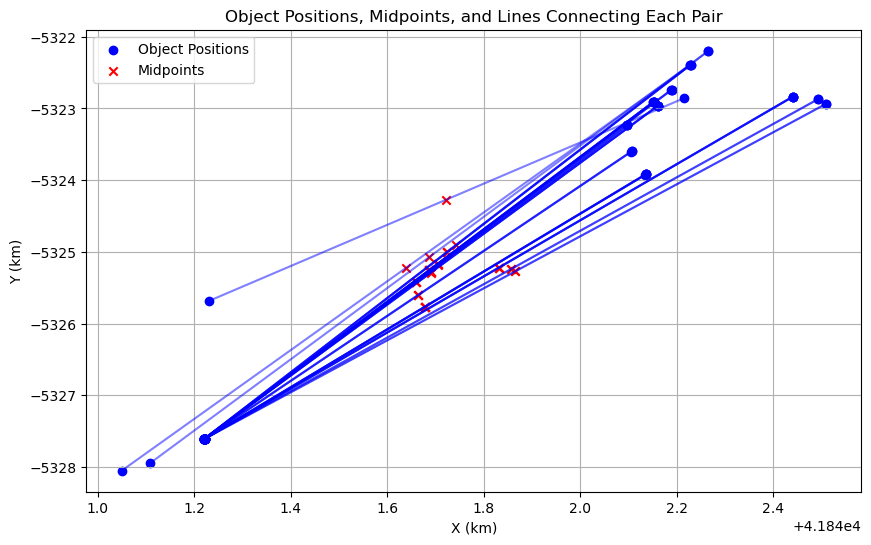

In [36]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

# Plot the positions of the objects (as points)
plt.scatter(df['X_km'], df['Y_km'], color='blue', label='Object Positions', marker='o')

# Plot the lines connecting each consecutive pair of objects
for i in range(0, len(df)-1, 2):
    plt.plot([df.loc[i, 'X_km'], df.loc[i+1, 'X_km']], 
             [df.loc[i, 'Y_km'], df.loc[i+1, 'Y_km']], 
             color='blue', linestyle='-', alpha=0.5)

# Plot the midpoints (as points)
plt.scatter(midpoints_x, midpoints_y, color='red', label='Midpoints', marker='x')

# Add labels and title
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.title('Object Positions, Midpoints, and Lines Connecting Each Pair')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'relative_distance_m' column to numeric, coercing errors to NaN
df['relative_distance_m'] = pd.to_numeric(df['relative_distance_m'], errors='coerce')

# Filter the DataFrame for objects with relative_distance_m < 500
filtered_df = df[df['relative_distance_m'] < 500]

filtered_df

,object_name,OBJECT_DESIGNATOR,CATALOG_NAME,OBJECT_TYPE,MANEUVERABLE,X_km,Y_km,Z_km,X_DOT_kms,Y_DOT_kms,Z_DOT_kms,file_name,event_time,creation_date,miss_distance_m,relative_distance_m,relative_speed_mps,midpoint_X_km,midpoint_Y_km
0,OBJECT1,00001,SATCAT,UNKNOWN,YES,41841.221445,-5327.607780,-18.514150,0.001704,-0.002318,0.003993,CAESAR_ALM_0.xml,2023-12-02T18:37:14.909,2023-11-24T04:11:19.791,4489.645940,316.530814,725.267060,41841.659359,-5325.422480
1,OBJECT2,20923,SATCAT,UNKNOWN,NO,41842.097274,-5323.237180,-17.977773,-0.009449,-0.088410,0.724046,CAESAR_ALM_0.xml,2023-12-02T18:37:14.909,2023-11-24T04:11:19.791,4489.645940,316.530814,725.267060,41841.659344,-5325.422129
2,OBJECT1,00001,SATCAT,UNKNOWN,YES,41841.221591,-5327.606632,-18.514151,0.001704,-0.002318,0.003993,CAESAR_ALM_1.xml,2023-12-02T18:37:14.909,2023-11-24T19:09:06.149,4487.991970,316.413691,725.267060,41841.830805,-5325.220592
3,OBJECT2,20923,SATCAT,UNKNOWN,NO,41842.097098,-5323.237626,-17.978105,-0.009449,-0.088410,0.724046,CAESAR_ALM_1.xml,2023-12-02T18:37:14.909,2023-11-24T19:09:06.149,4487.991970,316.413691,725.267060,41841.659444,-5325.421842
6,OBJECT1,00001,SATCAT,UNKNOWN,YES,41841.221590,-5327.606631,-18.514152,0.001704,-0.002318,0.003993,CAESAR_ALM_2.xml,2023-12-02T18:37:14.908,2023-11-25T04:04:24.094,4488.559616,316.539726,725.267060,41841.856979,-5325.237796
7,OBJECT2,20923,SATCAT,UNKNOWN,NO,41842.097297,-5323.237052,-17.978350,-0.009449,-0.088410,0.724046,CAESAR_ALM_2.xml,2023-12-02T18:37:14.908,2023-11-25T04:04:24.094,4488.559616,316.539726,725.267060,41841.856930,-5325.237943
22,OBJECT1,00001,SATCAT,UNKNOWN,YES,41841.221496,-5327.607849,-18.514031,0.001704,-0.002318,0.003993,CAESAR_TRJ_0.xml,2023-12-02T18:37:14.939,2023-11-24T04:14:01.482,3827.732234,440.468225,725.268962,41841.678543,-5325.762755
23,OBJECT2,20923,SATCAT,UNKNOWN,NO,41842.135444,-5323.918809,-18.058826,-0.009456,-0.088427,0.724046,CAESAR_TRJ_0.xml,2023-12-02T18:37:14.939,2023-11-24T04:14:01.482,3827.732234,440.468225,725.268962,41841.663915,-5325.602015
24,OBJECT1,00001,SATCAT,UNKNOWN,YES,41841.221496,-5327.607849,-18.514031,0.001704,-0.002318,0.003993,CAESAR_TRJ_1.xml,2023-12-02T18:37:14.939,2023-11-24T04:32:15.493,3827.732234,440.468225,725.268962,41841.663942,-5325.601805
25,OBJECT2,20923,SATCAT,UNKNOWN,NO,41842.135444,-5323.918809,-18.058826,-0.009456,-0.088427,0.724046,CAESAR_TRJ_1.xml,2023-12-02T18:37:14.939,2023-11-24T04:32:15.493,3827.732234,440.468225,725.268962,41841.705357,-5325.171511


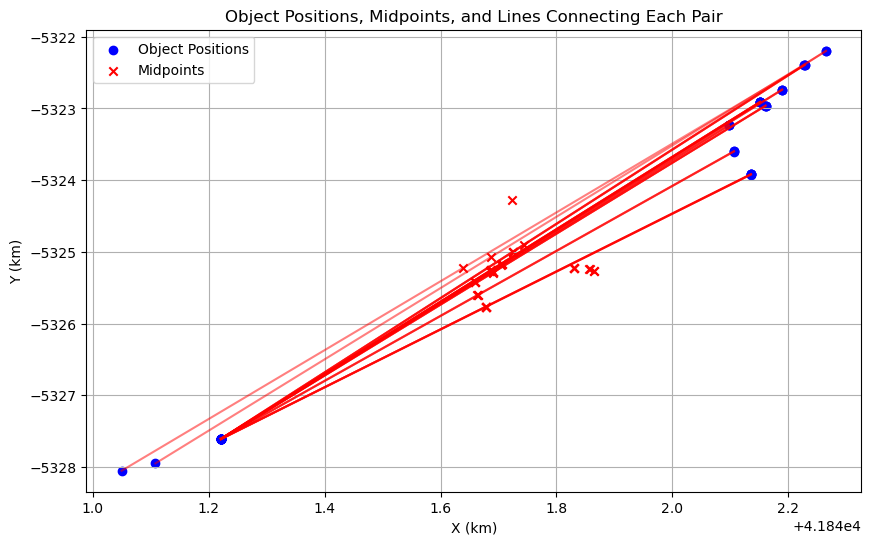

In [38]:
import matplotlib.pyplot as plt

# Reset the index of filtered_df to ensure consecutive indices
filtered_df = filtered_df.reset_index(drop=True)

# Plotting
plt.figure(figsize=(10, 6))

# Plot the positions of the filtered objects (as points)
plt.scatter(filtered_df['X_km'], filtered_df['Y_km'], color='blue', label='Object Positions', marker='o')

# Plot the lines connecting each consecutive pair of objects
for i in range(0, len(filtered_df)-1, 2):
    plt.plot([filtered_df.loc[i, 'X_km'], filtered_df.loc[i+1, 'X_km']], 
             [filtered_df.loc[i, 'Y_km'], filtered_df.loc[i+1, 'Y_km']], 
             color='red', linestyle='-', alpha=0.5)

# Plot the midpoints (as points)
plt.scatter(midpoints_x, midpoints_y, color='red', label='Midpoints', marker='x')

# Add labels and title
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.title('Object Positions, Midpoints, and Lines Connecting Each Pair')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


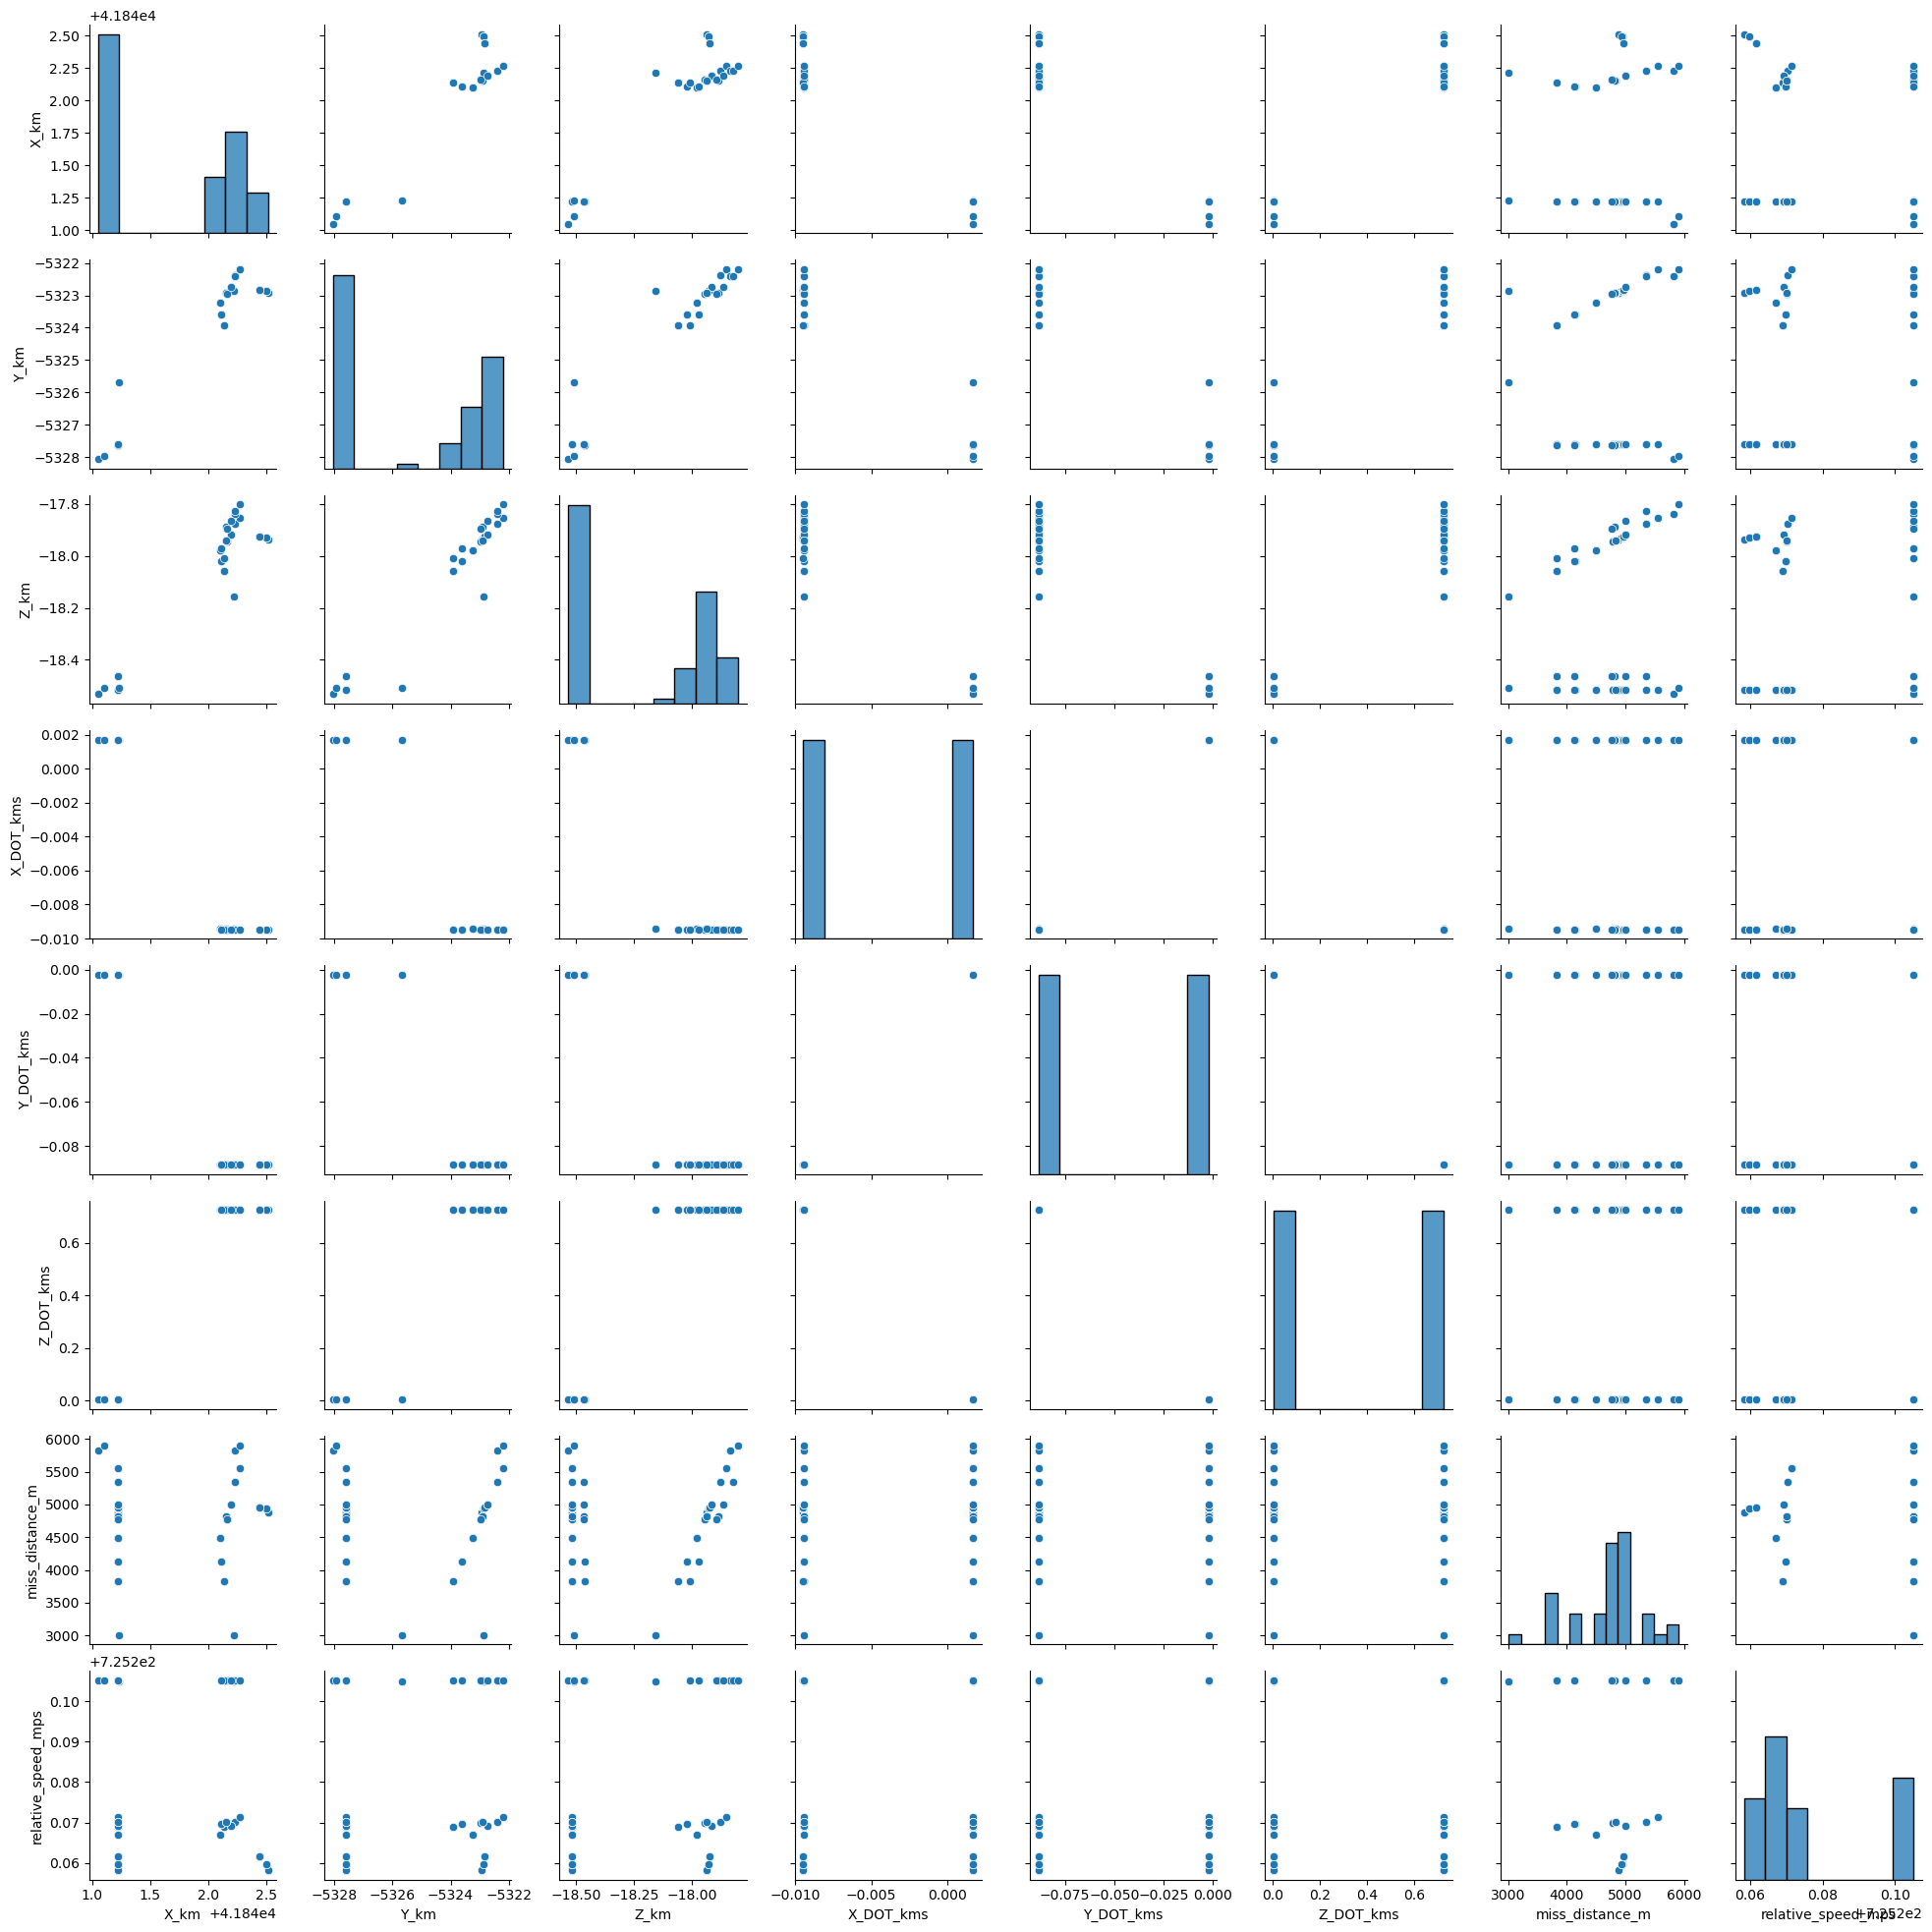

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)

In [174]:
def calculate_collision_probability(area1, area2, relative_velocity, miss_distance):
    """
    Calculate collision probability using the given formula.
    """
    if miss_distance == 0:  # Avoid division by zero
        return float('inf')
    return (area1 + area2) * relative_velocity / (miss_distance ** 2)

# Iterate over segments and extract data
for segment in root.findall(".//segment"):
    metadata = segment.find("metadata")
    data = segment.find("data")
    state_vector = data.find("stateVector")
    additionalParameters = data.find("additionalParameters")
    area_pc = additionalParameters.findtext("AREA_PC")
    
    if metadata is not None and state_vector is not None:
        # Extract relevant metadata and state vector values
        area1 = float(area_pc)  # Assume this is the first object's area
        area2 = float(relative_metadata.findtext("AREA_PC2", default=0))  # Area of Object2
        
        miss_distance = float(relative_metadata.findtext("MISS_DISTANCE", default=0))
        relative_velocity = float(relative_metadata.findtext("RELATIVE_SPEED", default=0))
        
        collision_probability = calculate_collision_probability(area1, area2, relative_velocity, miss_distance)

        object_data = {
            'object_name': metadata.findtext("OBJECT"),
            'OBJECT_DESIGNATOR': metadata.findtext("OBJECT_DESIGNATOR"),
            'CATALOG_NAME': metadata.findtext("CATALOG_NAME"),
            'OBJECT_TYPE': metadata.findtext("OBJECT_TYPE"),
            'MANEUVERABLE': metadata.findtext("MANEUVERABLE"),
            'X_km': float(state_vector.findtext("X", default=0)),
            'Y_km': float(state_vector.findtext("Y", default=0)),
            'Z_km': float(state_vector.findtext("Z", default=0)),
            'X_DOT_kms': float(state_vector.findtext("X_DOT", default=0)),
            'Y_DOT_kms': float(state_vector.findtext("Y_DOT", default=0)),
            'Z_DOT_kms': float(state_vector.findtext("Z_DOT", default=0)),
            'file_name': xml_file,  # Keep the original XML file name
            'event_time': tca,  # Add event time
            'creation_date': creation_date,
            'miss_distance_m': miss_distance,  # Add miss distance
            'relative_distance_m': relative_position_r,
            'relative_velocity': relative_velocity,
            'relative_speed_mps': relative_speed,  # Add relative speed
            'area_pc': area_pc,
            'collision_probability': collision_probability  # Add collision probability
        }
        all_data.append(object_data)

# Convert the accumulated data into a pandas DataFrame
df = pd.DataFrame(all_data)

# Save the DataFrame to CSV
df.to_csv(csv_file_path, index=False)

print(f"Data saved to {csv_file_path}")

df

Data saved to C:\Users\Admin\Desktop\final-cdms\output_data_with_probability_sorted.csv


,object_name,OBJECT_DESIGNATOR,CATALOG_NAME,OBJECT_TYPE,MANEUVERABLE,X_km,Y_km,Z_km,X_DOT_kms,Y_DOT_kms,Z_DOT_kms,file_name,event_time,creation_date,miss_distance_m,relative_distance_m,relative_velocity,relative_speed_mps,area_pc,collision_probability
0,OBJECT1,00001,SATCAT,UNKNOWN,YES,41841.221445,-5327.607780,-18.514150,0.001704,-0.002318,0.003993,CAESAR_ALM_0.xml,2023-12-02T18:37:14.909,2023-11-24T04:11:19.791,4489.645940,316.53081440936666,-0.5057018836219709,725.267060,1231.6299839133426,0.897929
1,OBJECT2,20923,SATCAT,UNKNOWN,NO,41842.097274,-5323.237180,-17.977773,-0.009449,-0.088410,0.724046,CAESAR_ALM_0.xml,2023-12-02T18:37:14.909,2023-11-24T04:11:19.791,4489.645940,316.53081440936666,-0.5057018836219709,725.267060,101.93376457451753,0.897929
2,OBJECT1,00001,SATCAT,UNKNOWN,YES,41841.221591,-5327.606632,-18.514151,0.001704,-0.002318,0.003993,CAESAR_ALM_1.xml,2023-12-02T18:37:14.909,2023-11-24T19:09:06.149,4487.991970,316.41369071276085,-0.5056981898086044,725.267060,1231.6299839133426,0.897598
3,OBJECT2,20923,SATCAT,UNKNOWN,NO,41842.097098,-5323.237626,-17.978105,-0.009449,-0.088410,0.724046,CAESAR_ALM_1.xml,2023-12-02T18:37:14.909,2023-11-24T19:09:06.149,4487.991970,316.41369071276085,-0.5056981898086044,725.267060,101.93376457451753,0.897598
4,OBJECT1,00001,SATCAT,UNKNOWN,YES,41841.221365,-5327.605577,-18.515201,0.001704,-0.002318,0.003993,CAESAR_ALM_10.xml,2023-12-02T18:37:14.729,2023-11-29T03:38:13.394,4958.406650,606.3668974482305,-0.5147594649196308,725.261703,1231.6299839133426,0.991681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,OBJECT2,20923,SATCAT,PAYLOAD,N/A,41842.188680,-5322.743463,-17.866756,-0.009454,-0.088414,0.724048,CSPOC_9.xml,2023-12-02T18:37:14.815,2023-11-26T02:06:03.000,4996.945217,345.0,725.305219,725.305219,7.4991,0.000218
96,OBJECT1,00001,SATCAT,PAYLOAD,N/A,41841.221094,-5327.609334,-18.463731,0.001703,-0.002318,0.003993,CSPOC_9.xml,2023-12-02T18:37:14.815,2023-11-26T02:06:03.000,4996.945217,345.0,725.305219,725.305219,47.6612,0.001384
97,OBJECT2,20923,SATCAT,PAYLOAD,N/A,41842.188680,-5322.743463,-17.866756,-0.009454,-0.088414,0.724048,CSPOC_9.xml,2023-12-02T18:37:14.815,2023-11-26T02:06:03.000,4996.945217,345.0,725.305219,725.305219,7.4991,0.000218
98,OBJECT1,00001,SATCAT,PAYLOAD,N/A,41841.221094,-5327.609334,-18.463731,0.001703,-0.002318,0.003993,CSPOC_9.xml,2023-12-02T18:37:14.815,2023-11-26T02:06:03.000,4996.945217,345.0,725.305219,725.305219,47.6612,0.001384


In [175]:
# Filter rows where 'miss_distance_m' is greater than 500
df1 = df[df['miss_distance_m'] < 10000]

df1

,object_name,OBJECT_DESIGNATOR,CATALOG_NAME,OBJECT_TYPE,MANEUVERABLE,X_km,Y_km,Z_km,X_DOT_kms,Y_DOT_kms,Z_DOT_kms,file_name,event_time,creation_date,miss_distance_m,relative_distance_m,relative_velocity,relative_speed_mps,area_pc,collision_probability
0,OBJECT1,00001,SATCAT,UNKNOWN,YES,41841.221445,-5327.607780,-18.514150,0.001704,-0.002318,0.003993,CAESAR_ALM_0.xml,2023-12-02T18:37:14.909,2023-11-24T04:11:19.791,4489.645940,316.53081440936666,-0.5057018836219709,725.267060,1231.6299839133426,0.897929
1,OBJECT2,20923,SATCAT,UNKNOWN,NO,41842.097274,-5323.237180,-17.977773,-0.009449,-0.088410,0.724046,CAESAR_ALM_0.xml,2023-12-02T18:37:14.909,2023-11-24T04:11:19.791,4489.645940,316.53081440936666,-0.5057018836219709,725.267060,101.93376457451753,0.897929
2,OBJECT1,00001,SATCAT,UNKNOWN,YES,41841.221591,-5327.606632,-18.514151,0.001704,-0.002318,0.003993,CAESAR_ALM_1.xml,2023-12-02T18:37:14.909,2023-11-24T19:09:06.149,4487.991970,316.41369071276085,-0.5056981898086044,725.267060,1231.6299839133426,0.897598
3,OBJECT2,20923,SATCAT,UNKNOWN,NO,41842.097098,-5323.237626,-17.978105,-0.009449,-0.088410,0.724046,CAESAR_ALM_1.xml,2023-12-02T18:37:14.909,2023-11-24T19:09:06.149,4487.991970,316.41369071276085,-0.5056981898086044,725.267060,101.93376457451753,0.897598
4,OBJECT1,00001,SATCAT,UNKNOWN,YES,41841.221365,-5327.605577,-18.515201,0.001704,-0.002318,0.003993,CAESAR_ALM_10.xml,2023-12-02T18:37:14.729,2023-11-29T03:38:13.394,4958.406650,606.3668974482305,-0.5147594649196308,725.261703,1231.6299839133426,0.991681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,OBJECT2,20923,SATCAT,PAYLOAD,N/A,41842.188680,-5322.743463,-17.866756,-0.009454,-0.088414,0.724048,CSPOC_9.xml,2023-12-02T18:37:14.815,2023-11-26T02:06:03.000,4996.945217,345.0,725.305219,725.305219,7.4991,0.000218
96,OBJECT1,00001,SATCAT,PAYLOAD,N/A,41841.221094,-5327.609334,-18.463731,0.001703,-0.002318,0.003993,CSPOC_9.xml,2023-12-02T18:37:14.815,2023-11-26T02:06:03.000,4996.945217,345.0,725.305219,725.305219,47.6612,0.001384
97,OBJECT2,20923,SATCAT,PAYLOAD,N/A,41842.188680,-5322.743463,-17.866756,-0.009454,-0.088414,0.724048,CSPOC_9.xml,2023-12-02T18:37:14.815,2023-11-26T02:06:03.000,4996.945217,345.0,725.305219,725.305219,7.4991,0.000218
98,OBJECT1,00001,SATCAT,PAYLOAD,N/A,41841.221094,-5327.609334,-18.463731,0.001703,-0.002318,0.003993,CSPOC_9.xml,2023-12-02T18:37:14.815,2023-11-26T02:06:03.000,4996.945217,345.0,725.305219,725.305219,47.6612,0.001384


In [176]:
df1 = df1.copy()
df1['relative_distance_m'] = pd.to_numeric(df1['relative_distance_m'], errors='coerce')
df1['relative_velocity'] = pd.to_numeric(df1['relative_velocity'], errors='coerce')

In [177]:
print(df1.dtypes)

object_name               object
OBJECT_DESIGNATOR         object
CATALOG_NAME              object
OBJECT_TYPE               object
MANEUVERABLE              object
X_km                     float64
Y_km                     float64
Z_km                     float64
X_DOT_kms                float64
Y_DOT_kms                float64
Z_DOT_kms                float64
file_name                 object
event_time                object
creation_date             object
miss_distance_m          float64
relative_distance_m      float64
relative_velocity        float64
relative_speed_mps       float64
area_pc                   object
collision_probability    float64
dtype: object


In [178]:
# Filter rows where 'miss_distance_m' is greater than 500
df2 = df1[df1['relative_distance_m'] > 600]

df2

,object_name,OBJECT_DESIGNATOR,CATALOG_NAME,OBJECT_TYPE,MANEUVERABLE,X_km,Y_km,Z_km,X_DOT_kms,Y_DOT_kms,Z_DOT_kms,file_name,event_time,creation_date,miss_distance_m,relative_distance_m,relative_velocity,relative_speed_mps,area_pc,collision_probability
4,OBJECT1,00001,SATCAT,UNKNOWN,YES,41841.221365,-5327.605577,-18.515201,0.001704,-0.002318,0.003993,CAESAR_ALM_10.xml,2023-12-02T18:37:14.729,2023-11-29T03:38:13.394,4958.406650,606.366897,-0.514759,725.261703,1231.6299839133426,0.991681
5,OBJECT2,20923,SATCAT,UNKNOWN,NO,41842.440245,-5322.835606,-17.925705,-0.009463,-0.088449,0.724036,CAESAR_ALM_10.xml,2023-12-02T18:37:14.729,2023-11-29T03:38:13.394,4958.406650,606.366897,-0.514759,725.261703,101.93376457451753,0.991681
8,OBJECT1,00001,SATCAT,UNKNOWN,YES,41841.221470,-5327.605977,-18.514557,0.001704,-0.002318,0.003993,CAESAR_ALM_3.xml,2023-12-02T18:37:14.807,2023-11-25T18:34:17.945,4879.397776,687.159093,-0.511566,725.258229,1231.6299839133426,0.975880
9,OBJECT2,20923,SATCAT,UNKNOWN,NO,41842.509149,-5322.935282,-17.935752,-0.009461,-0.088460,0.724031,CAESAR_ALM_3.xml,2023-12-02T18:37:14.807,2023-11-25T18:34:17.945,4879.397776,687.159093,-0.511566,725.258229,101.93376457451753,0.975880
10,OBJECT1,00001,SATCAT,UNKNOWN,YES,41841.221471,-5327.605978,-18.515144,0.001704,-0.002318,0.003993,CAESAR_ALM_4.xml,2023-12-02T18:37:14.807,2023-11-26T03:43:01.057,4878.947698,687.112490,-0.511570,725.258229,1231.6299839133426,0.975790
11,OBJECT2,20923,SATCAT,UNKNOWN,NO,41842.509044,-5322.935744,-17.936177,-0.009461,-0.088460,0.724031,CAESAR_ALM_4.xml,2023-12-02T18:37:14.807,2023-11-26T03:43:01.057,4878.947698,687.112490,-0.511570,725.258229,101.93376457451753,0.975790
12,OBJECT1,00001,SATCAT,UNKNOWN,YES,41841.221335,-5327.605814,-18.515457,0.001704,-0.002318,0.003993,CAESAR_ALM_5.xml,2023-12-02T18:37:14.729,2023-11-26T18:23:05.316,4938.585601,662.642196,-0.513501,725.259590,1231.6299839133426,0.987717
13,OBJECT2,20923,SATCAT,UNKNOWN,NO,41842.492622,-5322.869778,-17.929436,-0.009463,-0.088457,0.724033,CAESAR_ALM_5.xml,2023-12-02T18:37:14.729,2023-11-26T18:23:05.316,4938.585601,662.642196,-0.513501,725.259590,101.93376457451753,0.987717
14,OBJECT1,00001,SATCAT,UNKNOWN,YES,41841.221336,-5327.605815,-18.515583,0.001704,-0.002318,0.003993,CAESAR_ALM_6.xml,2023-12-02T18:37:14.730,2023-11-27T03:13:34.263,4938.317050,662.580134,-0.513507,725.259590,1231.6299839133426,0.987663
15,OBJECT2,20923,SATCAT,UNKNOWN,NO,41842.492523,-5322.870071,-17.929247,-0.009463,-0.088457,0.724033,CAESAR_ALM_6.xml,2023-12-02T18:37:14.730,2023-11-27T03:13:34.263,4938.317050,662.580134,-0.513507,725.259590,101.93376457451753,0.987663


In [179]:
df['creation_date'] = pd.to_datetime(df['creation_date'], errors='coerce')
df['miss_distance_m'] = pd.to_numeric(df['miss_distance_m'], errors='coerce')
df['relative_distance_m'] = pd.to_numeric(df['relative_distance_m'], errors='coerce')
# Define the function to classify the risk level
def classify_risk(row):
    # Check if TCA is within 7 days
    tca_in_7_days = (row['creation_date'] <= pd.Timestamp.now() + pd.Timedelta(days=7))
    
    # ALERT criteria
    if tca_in_7_days:
        if (row['miss_distance_m'] < 5000 and row['relative_distance_m'] < 500) and row['collision_probability'] > 0.7:
            return 'ALERT'
        elif row['miss_distance_m'] < 10000 and row['collision_probability'] >=0.1:
            return 'WARNING'
        return 'SAFE'

# Apply the classification function to the DataFrame
df['risk_level'] = df.apply(classify_risk, axis=1)

# Save the updated DataFrame to CSV
df.to_csv(csv_file_path, index=False)

print(f"Data with risk labels saved to {csv_file_path}")


Data with risk labels saved to C:\Users\Admin\Desktop\final-cdms\output_data_with_probability_sorted.csv


In [180]:
df

,object_name,OBJECT_DESIGNATOR,CATALOG_NAME,OBJECT_TYPE,MANEUVERABLE,X_km,Y_km,Z_km,X_DOT_kms,Y_DOT_kms,...,file_name,event_time,creation_date,miss_distance_m,relative_distance_m,relative_velocity,relative_speed_mps,area_pc,collision_probability,risk_level
0,OBJECT1,00001,SATCAT,UNKNOWN,YES,41841.221445,-5327.607780,-18.514150,0.001704,-0.002318,...,CAESAR_ALM_0.xml,2023-12-02T18:37:14.909,2023-11-24 04:11:19.791,4489.645940,316.530814,-0.5057018836219709,725.267060,1231.6299839133426,0.897929,ALERT
1,OBJECT2,20923,SATCAT,UNKNOWN,NO,41842.097274,-5323.237180,-17.977773,-0.009449,-0.088410,...,CAESAR_ALM_0.xml,2023-12-02T18:37:14.909,2023-11-24 04:11:19.791,4489.645940,316.530814,-0.5057018836219709,725.267060,101.93376457451753,0.897929,ALERT
2,OBJECT1,00001,SATCAT,UNKNOWN,YES,41841.221591,-5327.606632,-18.514151,0.001704,-0.002318,...,CAESAR_ALM_1.xml,2023-12-02T18:37:14.909,2023-11-24 19:09:06.149,4487.991970,316.413691,-0.5056981898086044,725.267060,1231.6299839133426,0.897598,ALERT
3,OBJECT2,20923,SATCAT,UNKNOWN,NO,41842.097098,-5323.237626,-17.978105,-0.009449,-0.088410,...,CAESAR_ALM_1.xml,2023-12-02T18:37:14.909,2023-11-24 19:09:06.149,4487.991970,316.413691,-0.5056981898086044,725.267060,101.93376457451753,0.897598,ALERT
4,OBJECT1,00001,SATCAT,UNKNOWN,YES,41841.221365,-5327.605577,-18.515201,0.001704,-0.002318,...,CAESAR_ALM_10.xml,2023-12-02T18:37:14.729,2023-11-29 03:38:13.394,4958.406650,606.366897,-0.5147594649196308,725.261703,1231.6299839133426,0.991681,WARNING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,OBJECT2,20923,SATCAT,PAYLOAD,N/A,41842.188680,-5322.743463,-17.866756,-0.009454,-0.088414,...,CSPOC_9.xml,2023-12-02T18:37:14.815,2023-11-26 02:06:03.000,4996.945217,345.000000,725.305219,725.305219,7.4991,0.000218,SAFE
96,OBJECT1,00001,SATCAT,PAYLOAD,N/A,41841.221094,-5327.609334,-18.463731,0.001703,-0.002318,...,CSPOC_9.xml,2023-12-02T18:37:14.815,2023-11-26 02:06:03.000,4996.945217,345.000000,725.305219,725.305219,47.6612,0.001384,SAFE
97,OBJECT2,20923,SATCAT,PAYLOAD,N/A,41842.188680,-5322.743463,-17.866756,-0.009454,-0.088414,...,CSPOC_9.xml,2023-12-02T18:37:14.815,2023-11-26 02:06:03.000,4996.945217,345.000000,725.305219,725.305219,7.4991,0.000218,SAFE
98,OBJECT1,00001,SATCAT,PAYLOAD,N/A,41841.221094,-5327.609334,-18.463731,0.001703,-0.002318,...,CSPOC_9.xml,2023-12-02T18:37:14.815,2023-11-26 02:06:03.000,4996.945217,345.000000,725.305219,725.305219,47.6612,0.001384,SAFE


In [181]:
# Filter the DataFrame to show only rows where 'risk_level' is 'ALERT'
alert_df = df[df['risk_level'] == 'SAFE']

# Display the filtered data
print(alert_df)

# Optionally, save the filtered data to a new CSV file
alert_df.to_csv("alert_data.csv", index=False)


   object_name OBJECT_DESIGNATOR CATALOG_NAME OBJECT_TYPE MANEUVERABLE  \
78     OBJECT1             00001       SATCAT     PAYLOAD          N/A   
79     OBJECT2             20923       SATCAT     PAYLOAD          N/A   
80     OBJECT1             00001       SATCAT     PAYLOAD          N/A   
81     OBJECT2             20923       SATCAT     PAYLOAD          N/A   
82     OBJECT1             00001       SATCAT     PAYLOAD          N/A   
83     OBJECT2             20923       SATCAT     PAYLOAD          N/A   
84     OBJECT1             00001       SATCAT     PAYLOAD          N/A   
85     OBJECT2             20923       SATCAT     PAYLOAD          N/A   
86     OBJECT1             00001       SATCAT     PAYLOAD          N/A   
87     OBJECT2             20923       SATCAT     PAYLOAD          N/A   
88     OBJECT1             00001       SATCAT     PAYLOAD          N/A   
89     OBJECT2             20923       SATCAT     PAYLOAD          N/A   
90     OBJECT1             00001      

In [182]:
df['creation_date'] = pd.to_datetime(df['creation_date'], errors='coerce')
df['event_time'] = pd.to_datetime(df['event_time'], errors='coerce')

df['days_until_tca'] = (df['event_time'] - df['creation_date']).dt.days

df.drop(columns=['object_name', 'OBJECT_DESIGNATOR', 'CATALOG_NAME', 
                 'OBJECT_TYPE', 'X_km', 'Y_km', 'Z_km', 'X_DOT_kms', 
                 'Y_DOT_kms', 'Z_DOT_kms','file_name'], inplace=True)


In [183]:
df

,MANEUVERABLE,event_time,creation_date,miss_distance_m,relative_distance_m,relative_velocity,relative_speed_mps,area_pc,collision_probability,risk_level,days_until_tca
0,YES,2023-12-02 18:37:14.909,2023-11-24 04:11:19.791,4489.645940,316.530814,-0.5057018836219709,725.267060,1231.6299839133426,0.897929,ALERT,8
1,NO,2023-12-02 18:37:14.909,2023-11-24 04:11:19.791,4489.645940,316.530814,-0.5057018836219709,725.267060,101.93376457451753,0.897929,ALERT,8
2,YES,2023-12-02 18:37:14.909,2023-11-24 19:09:06.149,4487.991970,316.413691,-0.5056981898086044,725.267060,1231.6299839133426,0.897598,ALERT,7
3,NO,2023-12-02 18:37:14.909,2023-11-24 19:09:06.149,4487.991970,316.413691,-0.5056981898086044,725.267060,101.93376457451753,0.897598,ALERT,7
4,YES,2023-12-02 18:37:14.729,2023-11-29 03:38:13.394,4958.406650,606.366897,-0.5147594649196308,725.261703,1231.6299839133426,0.991681,WARNING,3
...,...,...,...,...,...,...,...,...,...,...,...
95,N/A,2023-12-02 18:37:14.815,2023-11-26 02:06:03.000,4996.945217,345.000000,725.305219,725.305219,7.4991,0.000218,SAFE,6
96,N/A,2023-12-02 18:37:14.815,2023-11-26 02:06:03.000,4996.945217,345.000000,725.305219,725.305219,47.6612,0.001384,SAFE,6
97,N/A,2023-12-02 18:37:14.815,2023-11-26 02:06:03.000,4996.945217,345.000000,725.305219,725.305219,7.4991,0.000218,SAFE,6
98,N/A,2023-12-02 18:37:14.815,2023-11-26 02:06:03.000,4996.945217,345.000000,725.305219,725.305219,47.6612,0.001384,SAFE,6


In [184]:
df = df[df['days_until_tca'] < 8]

In [185]:
df

,MANEUVERABLE,event_time,creation_date,miss_distance_m,relative_distance_m,relative_velocity,relative_speed_mps,area_pc,collision_probability,risk_level,days_until_tca
2,YES,2023-12-02 18:37:14.909,2023-11-24 19:09:06.149,4487.991970,316.413691,-0.5056981898086044,725.267060,1231.6299839133426,0.897598,ALERT,7
3,NO,2023-12-02 18:37:14.909,2023-11-24 19:09:06.149,4487.991970,316.413691,-0.5056981898086044,725.267060,101.93376457451753,0.897598,ALERT,7
4,YES,2023-12-02 18:37:14.729,2023-11-29 03:38:13.394,4958.406650,606.366897,-0.5147594649196308,725.261703,1231.6299839133426,0.991681,WARNING,3
5,NO,2023-12-02 18:37:14.729,2023-11-29 03:38:13.394,4958.406650,606.366897,-0.5147594649196308,725.261703,101.93376457451753,0.991681,WARNING,3
6,YES,2023-12-02 18:37:14.908,2023-11-25 04:04:24.094,4488.559616,316.539726,-0.5056942185665567,725.267060,1231.6299839133426,0.897712,ALERT,7
...,...,...,...,...,...,...,...,...,...,...,...
95,N/A,2023-12-02 18:37:14.815,2023-11-26 02:06:03.000,4996.945217,345.000000,725.305219,725.305219,7.4991,0.000218,SAFE,6
96,N/A,2023-12-02 18:37:14.815,2023-11-26 02:06:03.000,4996.945217,345.000000,725.305219,725.305219,47.6612,0.001384,SAFE,6
97,N/A,2023-12-02 18:37:14.815,2023-11-26 02:06:03.000,4996.945217,345.000000,725.305219,725.305219,7.4991,0.000218,SAFE,6
98,N/A,2023-12-02 18:37:14.815,2023-11-26 02:06:03.000,4996.945217,345.000000,725.305219,725.305219,47.6612,0.001384,SAFE,6


In [186]:
df.loc[:, 'risk_level'] = df['risk_level'].map({
    'ALERT': 3,
    'WARNING': 2,
    'SAFE': 1
})


In [187]:
df

,MANEUVERABLE,event_time,creation_date,miss_distance_m,relative_distance_m,relative_velocity,relative_speed_mps,area_pc,collision_probability,risk_level,days_until_tca
2,YES,2023-12-02 18:37:14.909,2023-11-24 19:09:06.149,4487.991970,316.413691,-0.5056981898086044,725.267060,1231.6299839133426,0.897598,3,7
3,NO,2023-12-02 18:37:14.909,2023-11-24 19:09:06.149,4487.991970,316.413691,-0.5056981898086044,725.267060,101.93376457451753,0.897598,3,7
4,YES,2023-12-02 18:37:14.729,2023-11-29 03:38:13.394,4958.406650,606.366897,-0.5147594649196308,725.261703,1231.6299839133426,0.991681,2,3
5,NO,2023-12-02 18:37:14.729,2023-11-29 03:38:13.394,4958.406650,606.366897,-0.5147594649196308,725.261703,101.93376457451753,0.991681,2,3
6,YES,2023-12-02 18:37:14.908,2023-11-25 04:04:24.094,4488.559616,316.539726,-0.5056942185665567,725.267060,1231.6299839133426,0.897712,3,7
...,...,...,...,...,...,...,...,...,...,...,...
95,N/A,2023-12-02 18:37:14.815,2023-11-26 02:06:03.000,4996.945217,345.000000,725.305219,725.305219,7.4991,0.000218,1,6
96,N/A,2023-12-02 18:37:14.815,2023-11-26 02:06:03.000,4996.945217,345.000000,725.305219,725.305219,47.6612,0.001384,1,6
97,N/A,2023-12-02 18:37:14.815,2023-11-26 02:06:03.000,4996.945217,345.000000,725.305219,725.305219,7.4991,0.000218,1,6
98,N/A,2023-12-02 18:37:14.815,2023-11-26 02:06:03.000,4996.945217,345.000000,725.305219,725.305219,47.6612,0.001384,1,6


In [188]:
df.loc[:, 'MANEUVERABLE'] = df['MANEUVERABLE'].map({
    'YES': 1,   # 1 for 'YES' (maneuverable)
    'NO': 0,    # 0 for 'NO' (not maneuverable)
    'N/A': 0  # NaN for 'N/A' (not available)
})

df

,MANEUVERABLE,event_time,creation_date,miss_distance_m,relative_distance_m,relative_velocity,relative_speed_mps,area_pc,collision_probability,risk_level,days_until_tca
2,1,2023-12-02 18:37:14.909,2023-11-24 19:09:06.149,4487.991970,316.413691,-0.5056981898086044,725.267060,1231.6299839133426,0.897598,3,7
3,0,2023-12-02 18:37:14.909,2023-11-24 19:09:06.149,4487.991970,316.413691,-0.5056981898086044,725.267060,101.93376457451753,0.897598,3,7
4,1,2023-12-02 18:37:14.729,2023-11-29 03:38:13.394,4958.406650,606.366897,-0.5147594649196308,725.261703,1231.6299839133426,0.991681,2,3
5,0,2023-12-02 18:37:14.729,2023-11-29 03:38:13.394,4958.406650,606.366897,-0.5147594649196308,725.261703,101.93376457451753,0.991681,2,3
6,1,2023-12-02 18:37:14.908,2023-11-25 04:04:24.094,4488.559616,316.539726,-0.5056942185665567,725.267060,1231.6299839133426,0.897712,3,7
...,...,...,...,...,...,...,...,...,...,...,...
95,0,2023-12-02 18:37:14.815,2023-11-26 02:06:03.000,4996.945217,345.000000,725.305219,725.305219,7.4991,0.000218,1,6
96,0,2023-12-02 18:37:14.815,2023-11-26 02:06:03.000,4996.945217,345.000000,725.305219,725.305219,47.6612,0.001384,1,6
97,0,2023-12-02 18:37:14.815,2023-11-26 02:06:03.000,4996.945217,345.000000,725.305219,725.305219,7.4991,0.000218,1,6
98,0,2023-12-02 18:37:14.815,2023-11-26 02:06:03.000,4996.945217,345.000000,725.305219,725.305219,47.6612,0.001384,1,6


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


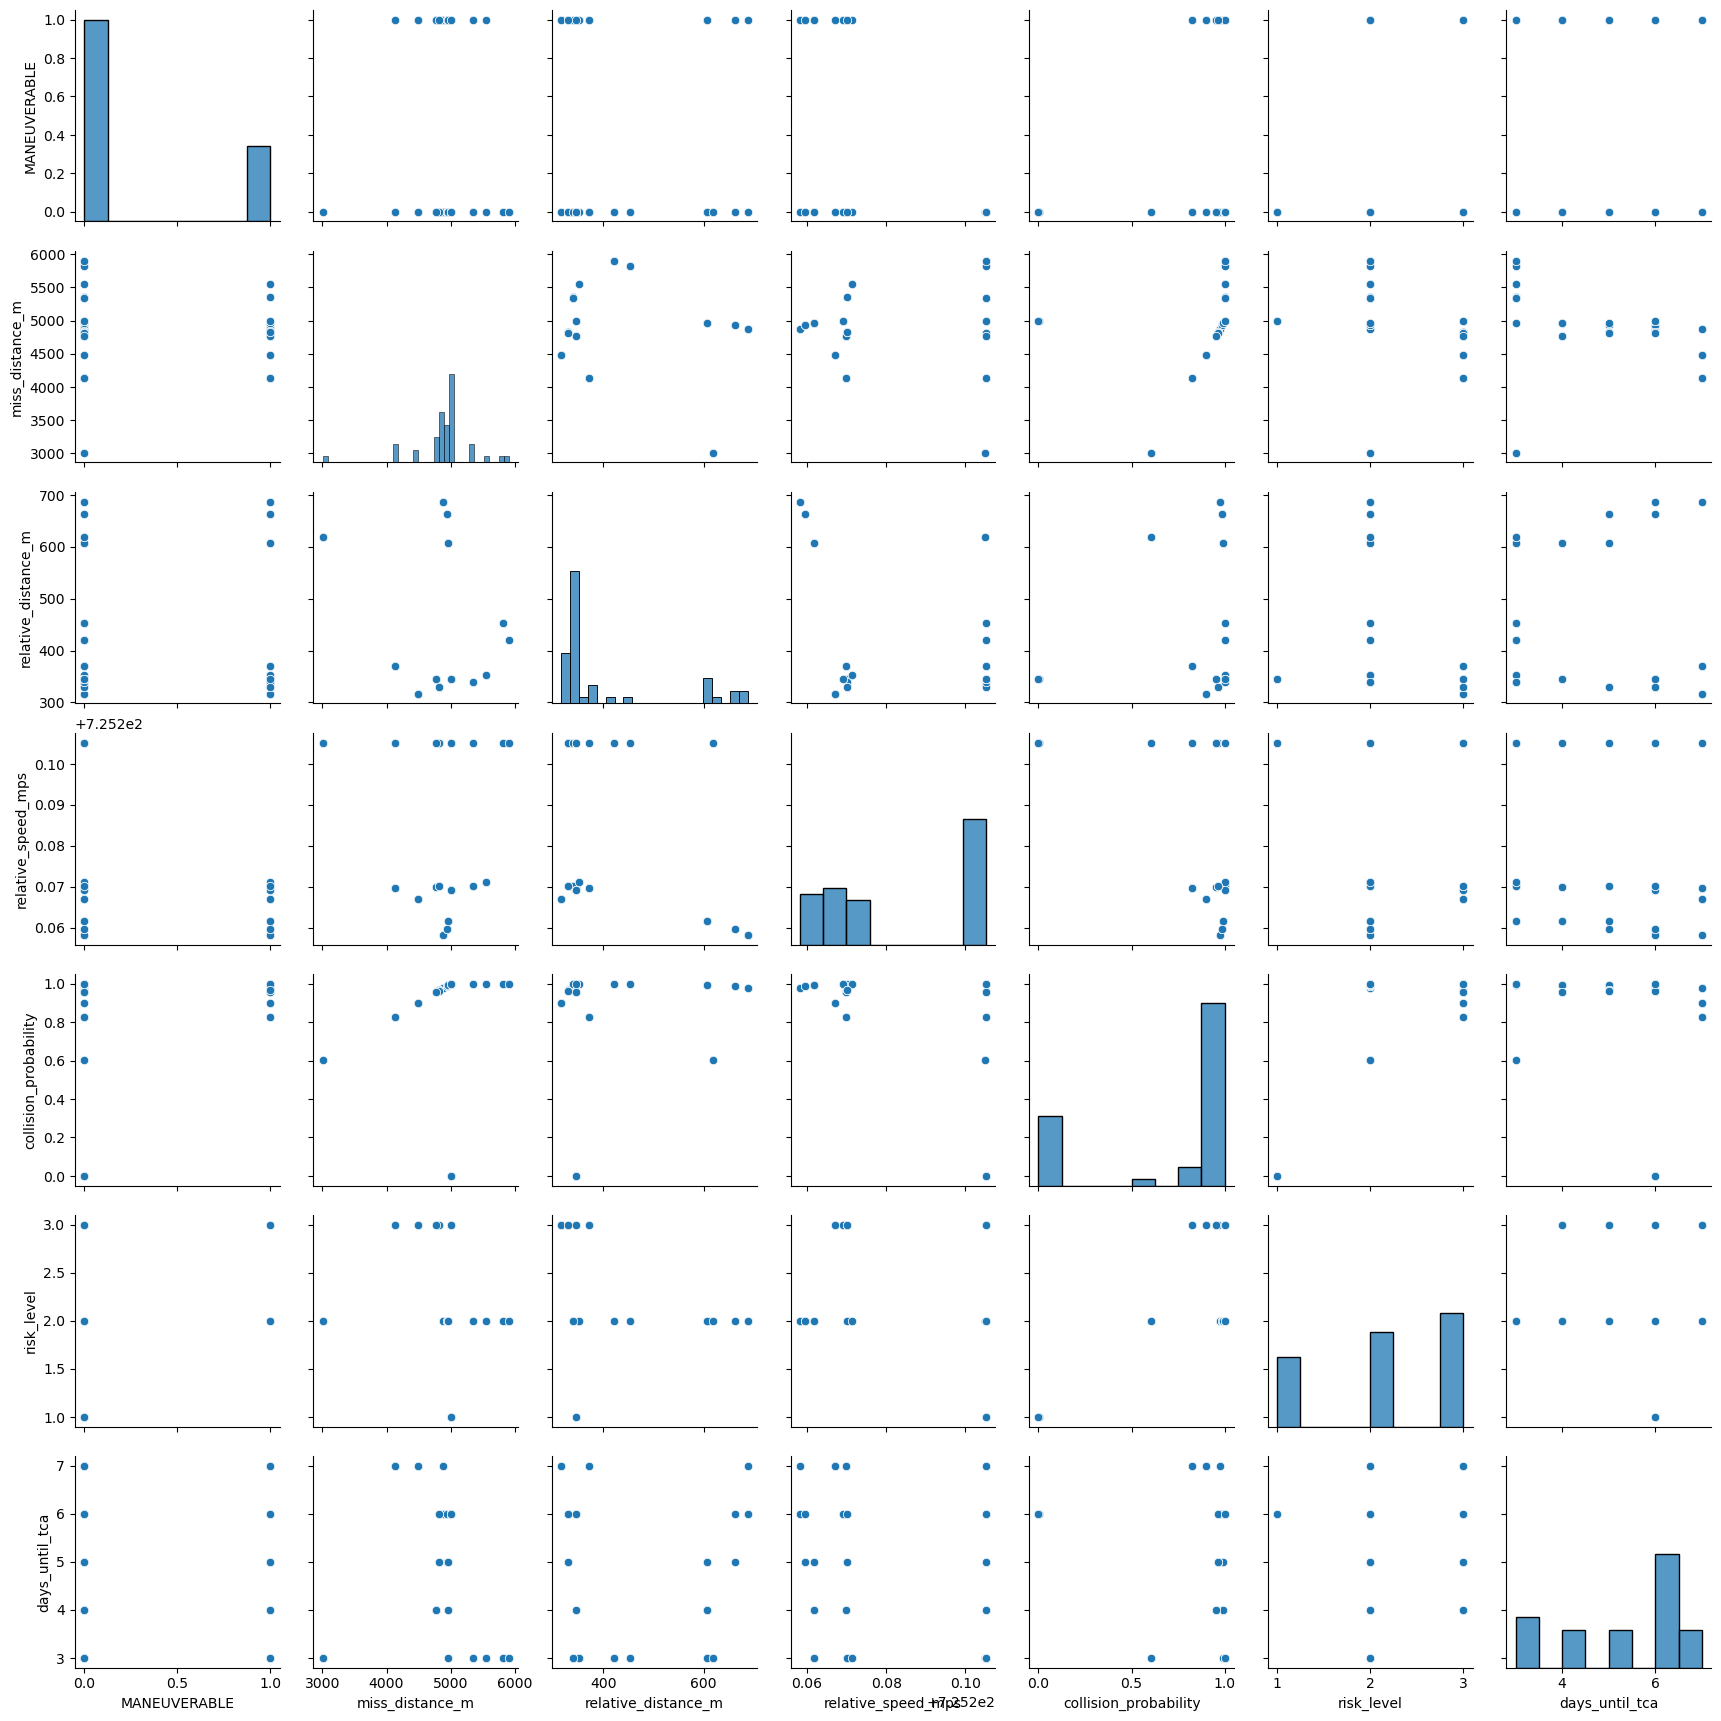

In [189]:
import seaborn as sns

sns.pairplot(df)
plt.show()

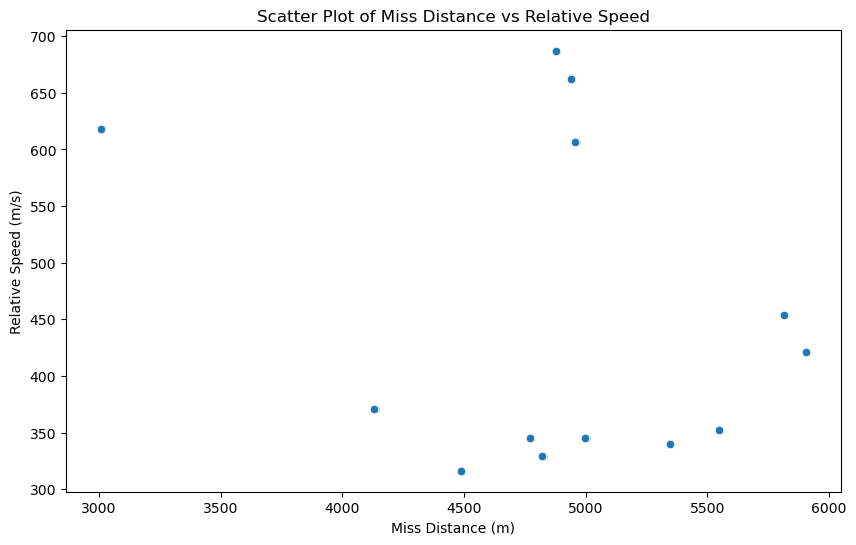

In [190]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='miss_distance_m', y='relative_distance_m', data=df)
plt.title('Scatter Plot of Miss Distance vs Relative Speed')
plt.xlabel('Miss Distance (m)')
plt.ylabel('Relative Speed (m/s)')
plt.show()


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


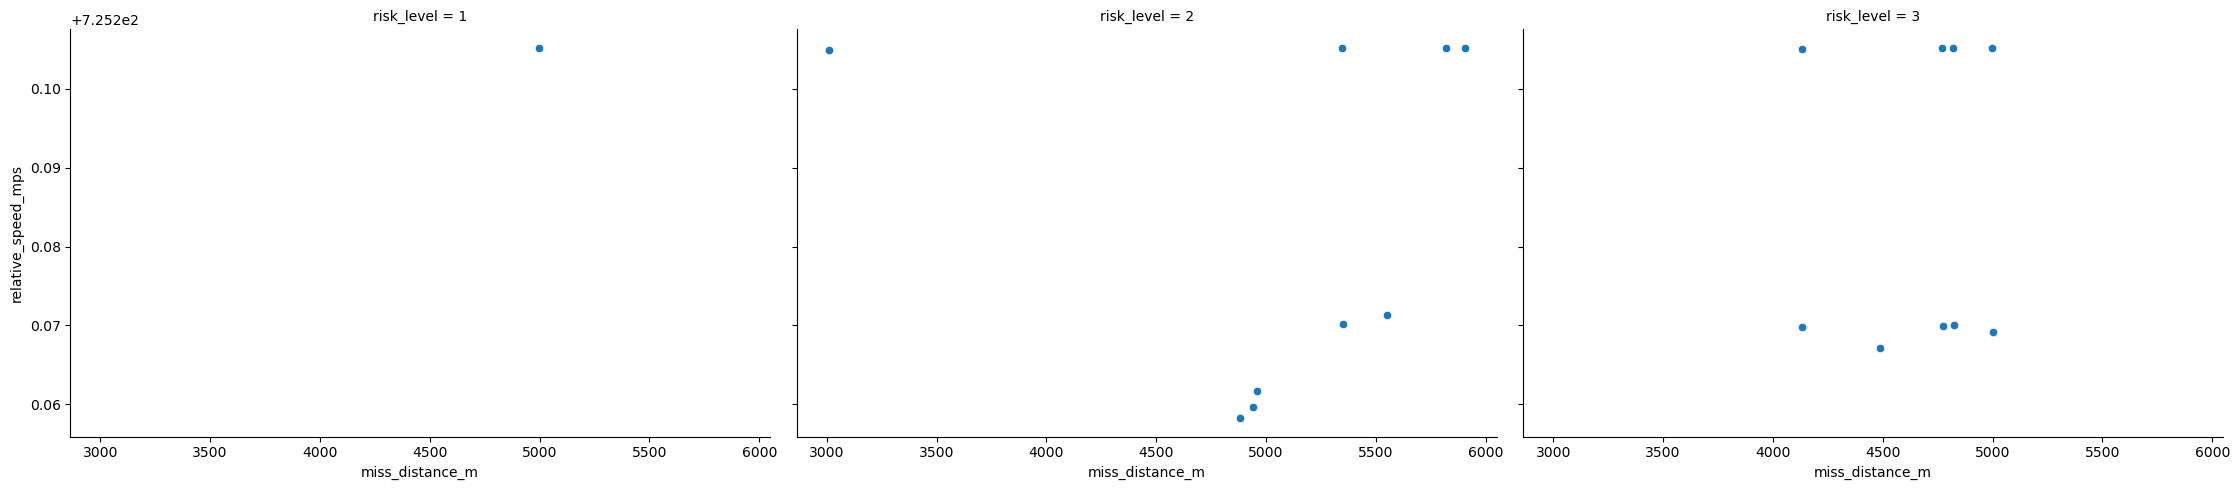

In [191]:
g = sns.FacetGrid(df, col="risk_level", height=5, aspect=1.5)
g.map(sns.scatterplot, 'miss_distance_m', 'relative_speed_mps')
plt.show()

In [192]:
df.loc[:, 'risk_level'] = df['risk_level'].astype(int)

In [166]:
df = df.drop(columns=['event_time', 'creation_date'])
df

KeyError: "['event_time', 'creation_date'] not found in axis"

In [167]:
print(df.dtypes)

MANEUVERABLE              object
miss_distance_m          float64
relative_distance_m      float64
relative_velocity         object
relative_speed_mps       float64
area_pc                   object
collision_probability    float64
risk_level                 int64
days_until_tca             int64
dtype: object


In [162]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [163]:
label_encoder = LabelEncoder()
df.loc[:, 'risk_level'] = label_encoder.fit_transform(df['risk_level'])

In [173]:
df['event_time'] = pd.to_datetime(df['event_time'])
df['creation_date'] = pd.to_datetime(df['creation_date'])
X = df[['MANEUVERABLE', 'miss_distance_m', 'relative_velocity', 'relative_speed_mps', 'area_pc', 'collision_probability', 'days_until_tca']]  # Select relevant features
y = df['risk_level']  # Target variable


KeyError: 'event_time'

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [172]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


KeyError: 'event_time'

In [146]:
# Target variable
y = df['risk_level']

In [148]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [150]:
# Model
model = Sequential()

model.add(Input(batch_shape=(batch, X_train.shape[1], 1)))
model.add(Conv1D(10, 8, activation='relu'))
model.add(Conv1D(10, 8, activation='relu'))
model.add(MaxPooling1D(6))
model.add(Dropout(0.5))

model.add(Conv1D(20, 8, activation='relu'))
model.add(Conv1D(20, 8, activation='relu'))
model.add(MaxPooling1D(6))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

model.summary()

In [151]:
# Train the model
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [152]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_scaled)

In [154]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

